# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Spring 2020

### Part I: Hybrid Images

In [1]:
!pip install opencv-python
!pip install opencv-contrib-python
!pip install pillow
!pip install matplotlib
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

import utils

    100% |████████████████████████████████| 28.2MB 732kB/s ta 0:00:011    43% |██████████████                  | 12.3MB 11.6MB/s eta 0:00:02
    100% |████████████████████████████████| 34.2MB 942kB/s ta 0:00:011 1% |▌                               | 542kB 2.4MB/s eta 0:00:15    18% |█████▊                          | 6.2MB 7.2MB/s eta 0:00:04


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
# im1_file = './nutmeg.jpg'
im1_file = './lion.jpg'
im2_file = './dea2.jpg'
# im2_file ='./DerekPicture.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


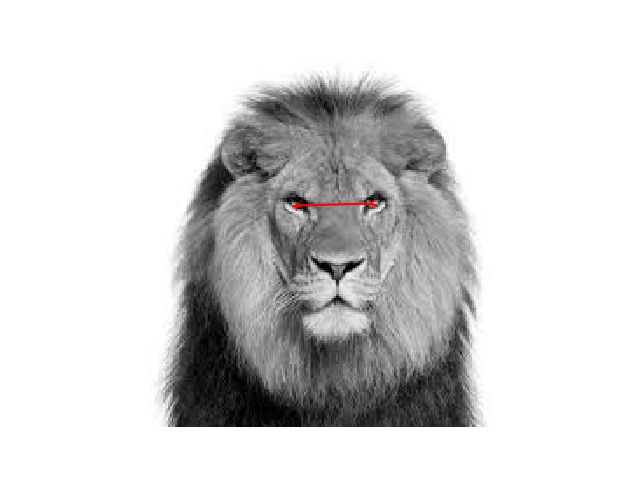

In [4]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


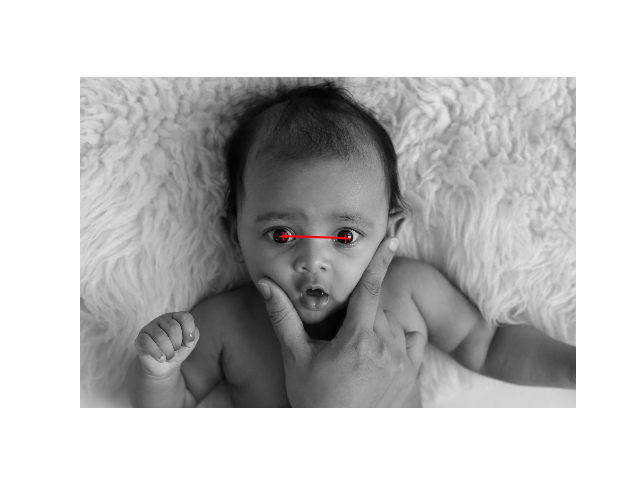

In [5]:
pts_im2 = utils.prompt_eye_selection(im2)

In [6]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [7]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


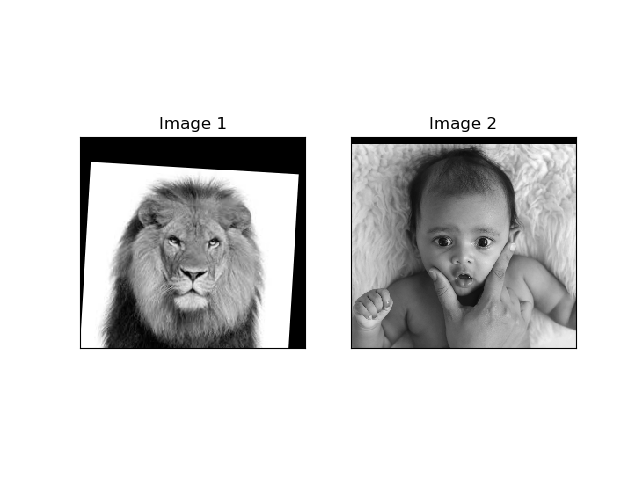

<IPython.core.display.Javascript object>


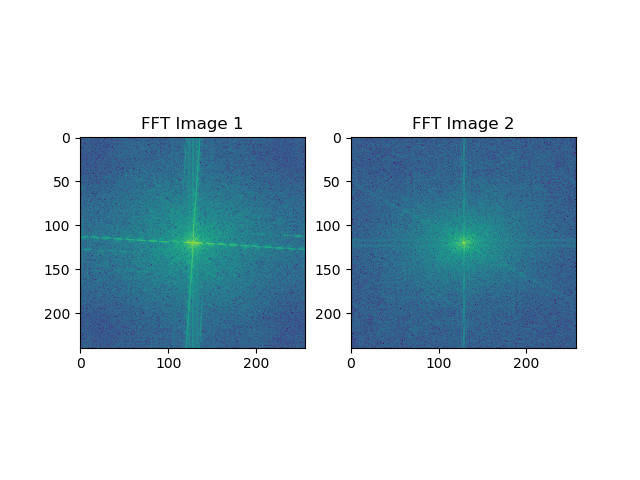

In [8]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

fig, axes = plt.subplots(1,2)
plt.subplot(121)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
plt.title("FFT Image 1")
plt.show()

plt.subplot(122)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
plt.title("FFT Image 2")
plt.show()


In [9]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''
    low_pass = signal.convolve2d(im2, utils.gaussian_kernel(cutoff_low, 3 * cutoff_low), mode='same', boundary='symm')
    high_pass = im1 - signal.convolve2d(im1, utils.gaussian_kernel(cutoff_high, 3 * cutoff_high), mode='same', boundary='symm')
        
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(low_pass,cmap='gray')
    axes[0].set_title('Low Pass'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(high_pass,cmap='gray')
    axes[1].set_title('High Pass'), axes[1].set_xticks([]), axes[1].set_yticks([]);

    fig, axes = plt.subplots(1,2)
    plt.subplot(121)
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass)))))
    plt.title("FFT Low Pass")
    plt.show()

    plt.subplot(122)
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass)))))
    plt.title("FFT High Pass")
    plt.show()

    return high_pass + low_pass

<IPython.core.display.Javascript object>


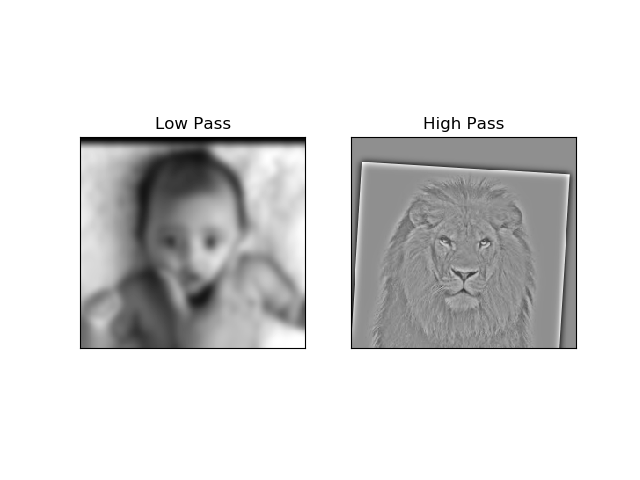

<IPython.core.display.Javascript object>


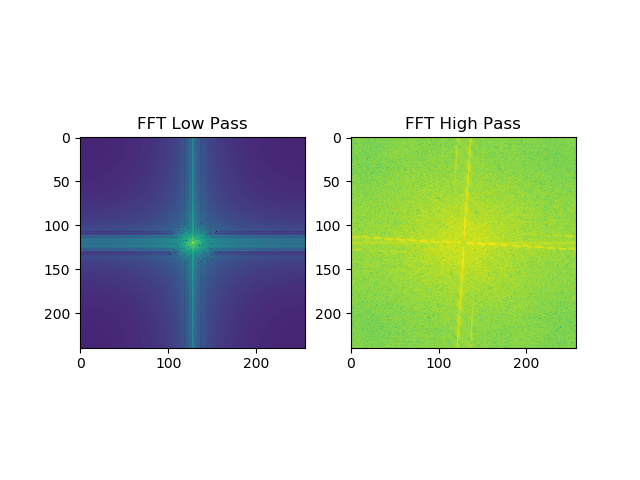

In [10]:
arbitrary_value = 20  # you should choose meaningful values; you might want to set to a fraction of image size

cutoff_low = 4
cutoff_high = 4
im_hybrid = hybridImage(im1, im2, cutoff_low, cutoff_high)

<IPython.core.display.Javascript object>


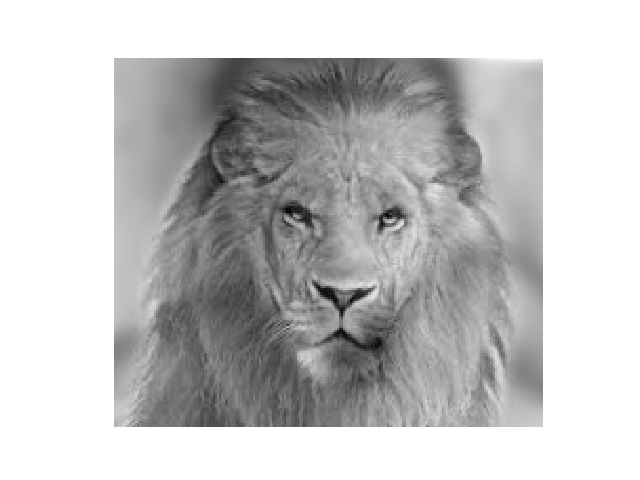

In [11]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

<IPython.core.display.Javascript object>


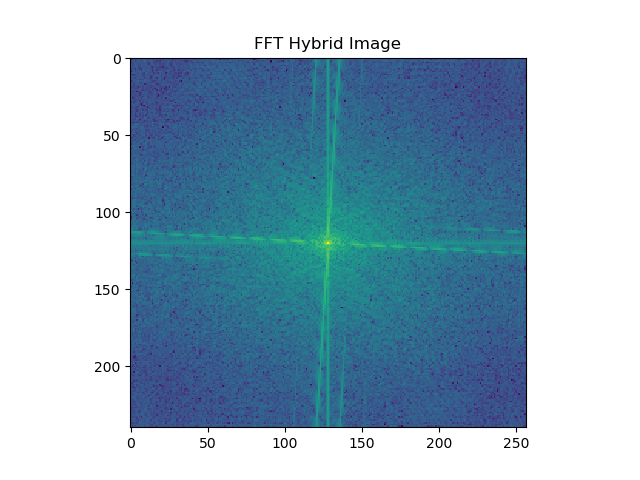

In [12]:
fig, axes = plt.subplots(1,1)
# plt.subplot(121)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid)))))
plt.title("FFT Hybrid Image")
plt.show()


### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

<IPython.core.display.Javascript object>


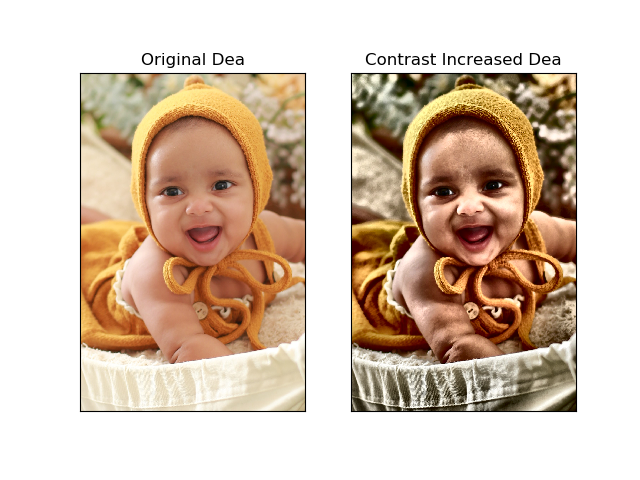

<IPython.core.display.Javascript object>


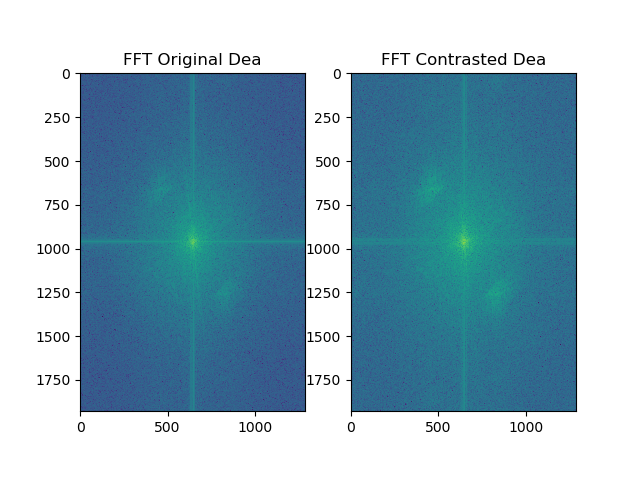

In [13]:
import cv2

img = cv2.imread("./dea1.jpg")
fig, axes = plt.subplots(1,2)
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Dea"), axes[0].set_xticks([]), axes[0].set_yticks([])

# hist = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit = 9, tileGridSize = (8, 8))
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
lab = cv2.merge((clahe.apply(l), a, b))
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].set_title("Contrast Increased Dea"), axes[1].set_xticks([]), axes[1].set_yticks([])

gray_im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) / 255.0
gray_im2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) / 255.0
fig, axes = plt.subplots(1,2)
plt.subplot(121)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_im)))))
plt.title("FFT Original Dea")
plt.show()

plt.subplot(122)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_im2)))))
plt.title("FFT Contrasted Dea")
plt.show()


#### Color enhancement 

<IPython.core.display.Javascript object>


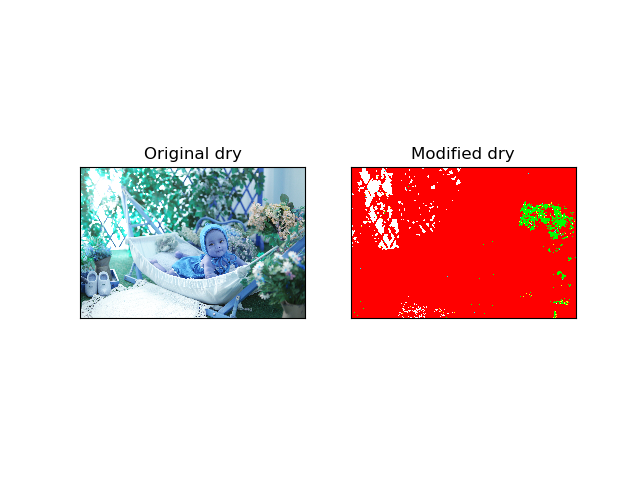

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [51]:
import cv2

img = cv2.imread("./dea3.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Increase saturation and decrease brightness
temp = cv2.merge((h, s, v * 3.9))
temp = np.clip(hsvImg, 0, 255)
temp = cv2.cvtColor(temp.astype(np.uint8), cv2.COLOR_HSV2RGB) 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original dry'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv2.cvtColor(img_hsv, cv2.COLOR_BGR2RGB))
axes[1].set_title('Modified dry'), axes[1].set_xticks([]), axes[1].set_yticks([]);

#### Color Shift 

<IPython.core.display.Javascript object>


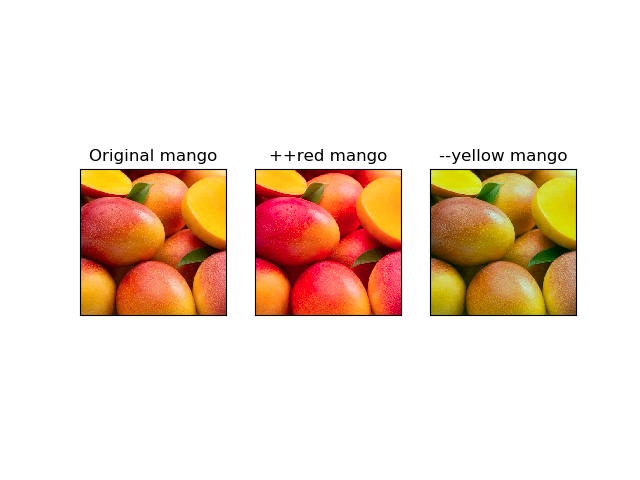

In [32]:
import cv2

img = cv2.imread("./mango.jpg")
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
img_red = img_lab.copy()
img_yellow = img_lab.copy()

img_red[:,:,1] = img_red[:,:,1] + img_red[:,:,1] * 0.15
img_yellow[:,:,1] = img_yellow[:,:,1] - img_yellow[:,:,1] * 0.17

fig, axes = plt.subplots(1, 3)
axes[0].imshow(cv2.cvtColor(img_lab, cv2.COLOR_Lab2RGB))
axes[0].set_title('Original mango'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv2.cvtColor(img_red, cv2.COLOR_Lab2RGB))
axes[1].set_title('++red mango'), axes[1].set_xticks([]), axes[1].set_yticks([]);
axes[2].imshow(cv2.cvtColor(img_yellow, cv2.COLOR_Lab2RGB))
axes[2].set_title('--yellow mango'), axes[2].set_xticks([]), axes[2].set_yticks([]);

#### Bells and Whistles

Gaussian Pyramids


<IPython.core.display.Javascript object>


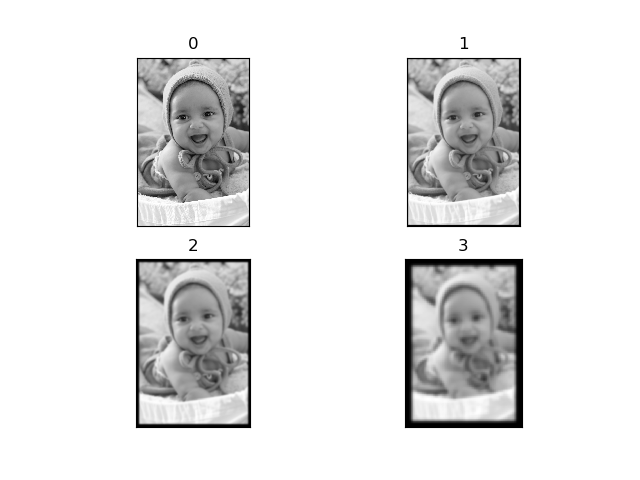

Laplacian Pyramids


<IPython.core.display.Javascript object>


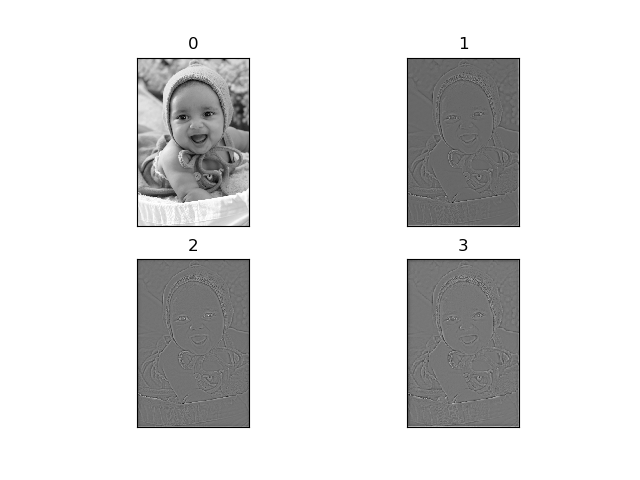

In [37]:
# Gaussian  Pyramid
%matplotlib notebook 
import matplotlib.pyplot as plt 
import cv2

img = cv2.imread("./dea1.jpg") 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) / 255.0

gaussian_pyramid = [img_gray]

pyramid_cnt = 3 
gaussian_kernal = utils.gaussian_kernel(4, 3*4)

for i in range(pyramid_cnt): 
    temp = signal.convolve2d(gaussian_pyramid[-1], gaussian_kernal) 
    temp = cv2.resize(temp, (0,0), fx = 0.5, fy = 0.5, interpolation = cv2.INTER_NEAREST) 
    gaussian_pyramid.append(temp)

print("Gaussian Pyramids")
fig, axes = plt.subplots(2, 2)
for i in range(len(gaussian_pyramid)):
    axes[int(i/2)][i%2].imshow(gaussian_pyramid[i], cmap='gray')
    axes[int(i/2)][i%2].set_title(i), axes[int(i/2)][i%2].set_xticks([]), axes[int(i/2)][i%2].set_yticks([])

laplacian_pyramid = [img_gray]
for i in range(pyramid_cnt): 
    temp = cv2.resize(laplacian_pyramid[-1], (0,0), fx = 0.5, fy = 0.5, interpolation = cv2.INTER_NEAREST)
    temp_gauss = signal.convolve2d(temp, gaussian_kernal)
    lap = cv2.subtract(temp, utils.crop_image(temp_gauss, np.array([[3*4, 3*4],[3*4 + temp.shape[1], 3*4 + temp.shape[0]]])))
    laplacian_pyramid.append(lap)

print("Laplacian Pyramids")
fig, axes = plt.subplots(2, 2)
for i in range(len(laplacian_pyramid)):
    axes[int(i/2)][i%2].imshow(laplacian_pyramid[i], cmap='gray')
    axes[int(i/2)][i%2].set_title(i), axes[int(i/2)][i%2].set_xticks([]), axes[int(i/2)][i%2].set_yticks([])
    